<a href="https://colab.research.google.com/github/acastellanos-ie/NLP-SAMBD-EN-2021/blob/main/text_preprocessing/arabic_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

The first step is to clone the repository to have access to all the data and files.

In [14]:
repository_name = "NLP-SAMBD-EN-2021"
repository_url = 'https://github.com/acastellanos-ie/' + repository_name

In [15]:
! git clone $repository_url

Cloning into 'NLP-SAMBD-EN-2021'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 181 (delta 63), reused 153 (delta 46), pack-reused 0
Receiving objects: 100% (181/181), 5.28 MiB | 21.03 MiB/s, done.
Resolving deltas: 100% (63/63), done.


Install the requirements (be aware that it could take a while)

In [16]:
! pip install -Uqqr $repository_name/requirements.txt

     |████████████████████████████████| 12.0 MB 17.0 MB/s 
     |████████████████████████████████| 3.4 MB 24.6 MB/s 
     |████████████████████████████████| 1.5 MB 59.0 MB/s 
     |████████████████████████████████| 58 kB 5.2 MB/s 
     |████████████████████████████████| 432 kB 54.7 MB/s 
     |████████████████████████████████| 126 kB 62.4 MB/s 
     |████████████████████████████████| 10.4 MB 58.2 MB/s 
     |████████████████████████████████| 10.5 MB 41.3 MB/s 
     |████████████████████████████████| 24.8 MB 1.5 MB/s 
     |████████████████████████████████| 631 kB 53.8 MB/s 
     |████████████████████████████████| 385 kB 47.9 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.3 MB/s eta 0:00:37tcmalloc: large alloc 1147494400 bytes == 0x56367e588000 @  0x7f72d8b99615 0x563644dda4cc 0x563644eba47a 0x563644ddd2ed 0x563644ecee1d 0x563644e50e99 0x563644e4b9ee 0x563644ddebda 0x563644e50d00 0x563644e4b9ee 0x563644ddebda 0x563644e4d737 0x563644ecfc66 0x563644e4cdaf 0x563644ecfc66 0x56364

Everything is set up properly! You can now move on to the practice code.

I do recommend you to restart the environment at this point to ensure that Google Colab is aware of the installed packages and their configuration (see image below).

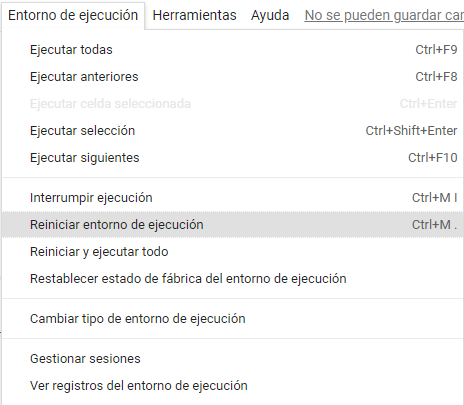

In order to use all the components provided in CAMeL Tools, we need to install all the datasets required by these components.
To do this in Colab, we need to first mount a Google Drive and create a directory where the data will be installed.

Run the code below and follow the instructions in the output.

In [12]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

%mkdir /content/drive/MyDrive/NLP/
%mkdir /content/drive/MyDrive/NLP/camel_tools

Mounted at /content/drive


Next, we need to tell CAMeL Tools to install the data in the newly created directory. This will take a couple of minutes to complete.

**NOTE:** You will need at least 2.3GB of available space on your Google Drive to install all the CAMeL Tools data.

In [17]:
os.environ['CAMELTOOLS_DATA'] = '/content/drive/MyDrive/NLP/camel_tools'

!export | camel_data full

# Introduction

This notebook provides a quick overview of the different pre-processing steps needed to deal with textual contents in Arabic. It does not intend to be a full review but to provide you with illustrative examples and pointers to additional materials.

To that end, I have used the guidelines and functionalities provided by [CAMeL Tools](https://github.com/CAMeL-Lab/camel_tools), one of the libraries that I recommended you to check.

For more detailed information please refer to the [CAMeL Tools documentation](https://camel-tools.readthedocs.io/en/latest/index.html).

# Dediacritization

Dediacritization is the process of removing Arabic diacritical marks. 

As discussed in class, Diacritics increase data sparsity and so most Arabic NLP techniques ignore them. The example below shows how diacritics can be removed from Arabic text using the [`dediac_ar`](https://camel-tools.readthedocs.io/en/latest/api/utils/dediac.html#camel_tools.utils.dediac.dediac_ar) function:

In [18]:
from camel_tools.utils.dediac import dediac_ar

sentence = "هَلْ ذَهَبْتَ إِلَى المَكْتَبَةِ؟"
print(sentence)

sent_dediac = dediac_ar(sentence)
print(sent_dediac)

هَلْ ذَهَبْتَ إِلَى المَكْتَبَةِ؟
هل ذهبت إلى المكتبة؟


# Tokenization



## Word Tokenization

Tokenization is the step to split the entire sentence into the individual units of meaning (i.e., words). In class, we reviewed the standard process and the challenges it posed to Arabic.

In this sense, there are different tokenization strategies that we can follow.

Python does provide the `split()` method to tokenize words by whitespace, but it doesn't separate punctuation from words. For example:

In [19]:
sentence = "هَلْ ذَهَبْتَ إِلَى المَكْتَبَةِ؟"
print(sentence)

sent_split = sentence.split()
print(sent_split)

هَلْ ذَهَبْتَ إِلَى المَكْتَبَةِ؟
['هَلْ', 'ذَهَبْتَ', 'إِلَى', 'المَكْتَبَةِ؟']


A similar function to split by whitespace and separate punctuation is also provided by CAMeL Tools [`simple_word_tokenize`](https://camel-tools.readthedocs.io/en/latest/api/tokenizers/word.html#camel_tools.tokenizers.word.simple_word_tokenize).

The example below is similar to the one above, but this time we use `simple_word_tokenize()` instead of `split()`.

In [20]:
from camel_tools.tokenizers.word import simple_word_tokenize

sentence = "هَلْ ذَهَبْتَ إِلَى المَكْتَبَةِ؟"
print(sentence)

sent_split = simple_word_tokenize(sentence)
print(sent_split)

هَلْ ذَهَبْتَ إِلَى المَكْتَبَةِ؟
['هَلْ', 'ذَهَبْتَ', 'إِلَى', 'المَكْتَبَةِ', '؟']


## Morphological Tokenization

The tokenization strategies mentioned above are simply splitting sentences by whitespace and separating punctuation. However, this is not the best choice for Arabic. In contrast, morphological tokenization splits Arabic words into component prefixes, stems, and suffixes.

CAMeL Tools provides the [`MorphologicalTokenizer`](https://camel-tools.readthedocs.io/en/latest/api/tokenizers/morphological.html#camel_tools.tokenizers.morphological.MorphologicalTokenizer) class to tokenize words in different schemes. It behaves very much like the `DefaultTagger` in that it uses a disambiguator first to disambiguate words and then extracts a particular tokenization feature, but it has the following differences:

- While the `DefaultTagger` produces exactly one output for each input word, the `MorphologicalTokenizer` might produce multiple output tokens.
-  The `MorphologicalTokenizer` can be configured to produce diacritized and undiacritized output.

In [21]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tokenizers.morphological import MorphologicalTokenizer

# The tokenizer expects pre-tokenized text
sentence = simple_word_tokenize('فتنفست الصعداء')
print(sentence)

# Load a pretrained disambiguator to use with a tokenizer
mle = MLEDisambiguator.pretrained('calima-msa-r13')

# Without providing additional arguments, the tokenizer will output undiacritized
# morphological tokens for each input word delimited by an underscore.
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok')
tokens = tokenizer.tokenize(sentence)
print(tokens)

# By specifying `split=True`, the morphological tokens are output as seperate
# strings.
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok', split=True)
tokens = tokenizer.tokenize(sentence)
print(tokens)

# We can output diacritized tokens by setting `diac=True`
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok', split=True, diac=True)
tokens = tokenizer.tokenize(sentence)
print(tokens)

['فتنفست', 'الصعداء']
['ف+_تنفست', 'ال+_صعداء']
['ف+', 'تنفست', 'ال+', 'صعداء']
['فَ+', 'تَنَفَّسْتُ', 'ال+', 'صُعَداءَ']


# Tagging

This step focuses on identifying the role of a given word in the context of a particular sentence. 

CAMeL Tools provides a [`DefaultTagger`](https://camel-tools.readthedocs.io/en/latest/api/tagger/default.html#camel_tools.tagger.default.DefaultTagger) for the POS Tagging of Arabic contents.

In [22]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tagger.default import DefaultTagger

mle = MLEDisambiguator.pretrained()
tagger = DefaultTagger(mle, 'pos')

# The tagger expects pre-tokenized text
sentence = simple_word_tokenize('نجح بايدن في الانتخابات')

pos_tags = tagger.tag(sentence)

print(pos_tags)

['verb', 'noun_prop', 'prep', 'noun']


# Parsing

If Tagging tries to discover the role of a word in a sentence, Parsing focuses on identifying the relationship between those different words.

Several libraries are implementing this functionality. In the other notebook, we used spacy and NLTK for the Dependency Parsing of English text. However, not all these libraries offer this functionality for Arabic.

In this sense, we will use [Stanza](https://stanfordnlp.github.io/stanza/), which includes a collection of NLP tools to a large variety of languages, Arabic among them.

The first thing to do is to import the Stanza library and to download the Arabic package. This package contains the different models and modules to perform the different NLP functionalities, including Dependency Parsing.

In [23]:
import stanza
stanza.download('ar')   # This downloads the Arabic models for the neural pipeline

2021-12-26 10:53:02 INFO: Downloading default packages for language: ar (Arabic)...


2021-12-26 10:53:15 INFO: Finished downloading models and saved to /root/stanza_resources.


Then, we can create a Pipeline (the basic Stanza object to execute all the NLP processes) using the arabic package that we have just downloaded


In [24]:
nlp = stanza.Pipeline("ar") # This sets up a default neural pipeline in Arabic

2021-12-26 10:53:15 INFO: Loading these models for language: ar (Arabic):
| Processor | Package |
-----------------------
| tokenize  | padt    |
| mwt       | padt    |
| pos       | padt    |
| lemma     | padt    |
| depparse  | padt    |
| ner       | aqmar   |

2021-12-26 10:53:15 INFO: Use device: cpu
2021-12-26 10:53:15 INFO: Loading: tokenize
2021-12-26 10:53:15 INFO: Loading: mwt
2021-12-26 10:53:15 INFO: Loading: pos
2021-12-26 10:53:16 INFO: Loading: lemma
2021-12-26 10:53:16 INFO: Loading: depparse
2021-12-26 10:53:16 INFO: Loading: ner
2021-12-26 10:53:17 INFO: Done loading processors!


Finally, we can analyze any sentence in arabic with the Pipeline object and pring the Dependency Parsing relationships.

In [25]:
doc = nlp("إمارة أبوظبي هي إحدى إمارات دولة الإمارات العربية المتحدة السبع.")
doc.sentences[0].print_dependencies()

('إمارة', 4, 'nsubj')
('أبوظبي', 1, 'nmod')
('هي', 4, 'nmod')
('إحدى', 0, 'root')
('إمارات', 4, 'nmod')
('دولة', 5, 'nmod')
('الإمارات', 6, 'nmod')
('العربية', 7, 'amod')
('المتحدة', 7, 'amod')
('السبع', 7, 'nummod')
('.', 4, 'punct')


# Named Entitiy Recognition

Finally, CAMeL Tools comes with an easy-to-use, pretrained [named-entitity recognition](https://en.wikipedia.org/wiki/Named-entity_recognition)  (NER) system that can be accessed using the [`NERecognizer`](https://camel-tools.readthedocs.io/en/latest/api/ner.html#camel_tools.ner.NERecognizer) class. 

For each token in an input sentence, `NERecognizer` outputs a label that indicates the type of named-entity. The system outputs one of the following labels for each token: `'B-LOC'`, `'B-ORG'`, `'B-PERS'`, `'B-MISC'`, `'I-LOC'`, `'I-ORG'`, `'I-PERS'`, `'I-MISC'`, `'O'`.
Named-entites can either be a `LOC` (location), `ORG` (organization), `PERS` (person), or `MISC` (miscallaneous).

Labels beginning with `B` indicate that their corresponding tokens are the beginning of a multi-word named-entity or are a single-token named-entity'. Those begining with `I` indicate that their corresponding tokens are continuations of a multi-word named-entity. Words that aren't named-entities are given the `'O'` label.

The example below illustrates how `NERecognizer` can be used to label named-entities in a given sentence.


In [26]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.ner import NERecognizer

ner = NERecognizer.pretrained()

# NERecognizer expects pre-tokenized text
sentence = simple_word_tokenize('إمارة أبوظبي هي إحدى إمارات دولة الإمارات العربية المتحدة السبع.')

labels = ner.predict_sentence(sentence)

# Print each token paired with it's NER label
print(list(zip(sentence, labels)))

[('إمارة', 'O'), ('أبوظبي', 'B-LOC'), ('هي', 'O'), ('إحدى', 'O'), ('إمارات', 'O'), ('دولة', 'O'), ('الإمارات', 'B-LOC'), ('العربية', 'I-LOC'), ('المتحدة', 'I-LOC'), ('السبع', 'O'), ('.', 'O')]
